<a href="https://colab.research.google.com/github/krish-crozz/AI---Disease/blob/main/AI_Disease_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample heart disease dataset (hardcoded)
data = {
    'age': [63, 37, 41, 56, 57],
    'sex': [1, 1, 0, 1, 0],
    'cp': [3, 2, 1, 1, 0],
    'trestbps': [145, 130, 130, 120, 120],
    'chol': [233, 250, 204, 236, 354],
    'fbs': [1, 0, 0, 0, 0],
    'restecg': [0, 1, 0, 1, 1],
    'thalach': [150, 187, 172, 178, 163],
    'exang': [0, 0, 0, 0, 1],
    'oldpeak': [2.3, 3.5, 1.4, 0.8, 0.6],
    'slope': [0, 0, 2, 2, 2],
    'ca': [0, 0, 0, 0, 0],
    'thal': [1, 2, 2, 2, 2],
    'target': [1, 1, 1, 1, 0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display first few rows
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       0  


In [ ]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:

df.fillna(df.mean(), inplace=True)


In [ ]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

df = df.drop_duplicates()


Duplicate rows: 0


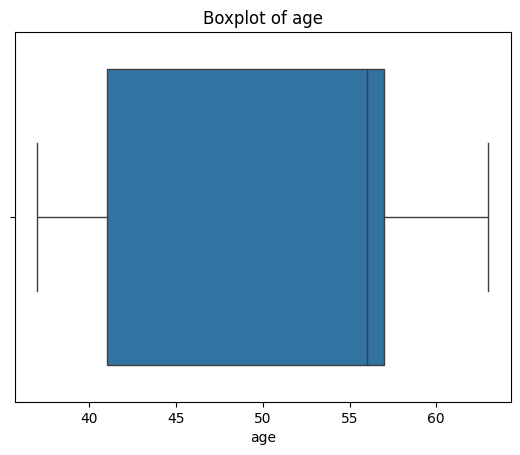

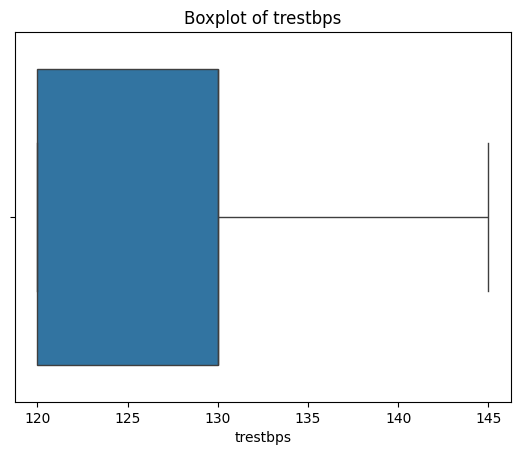

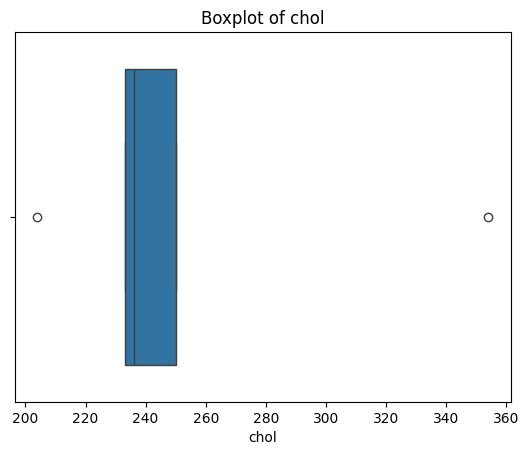

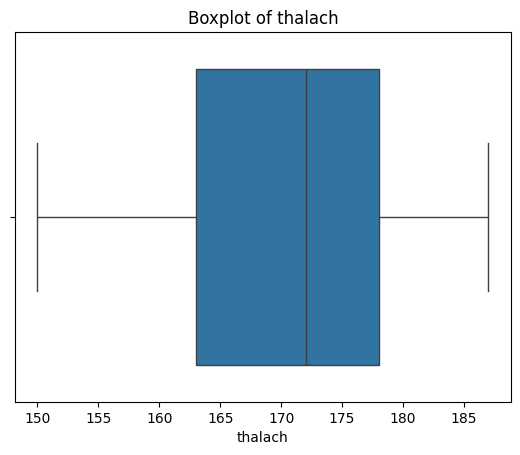

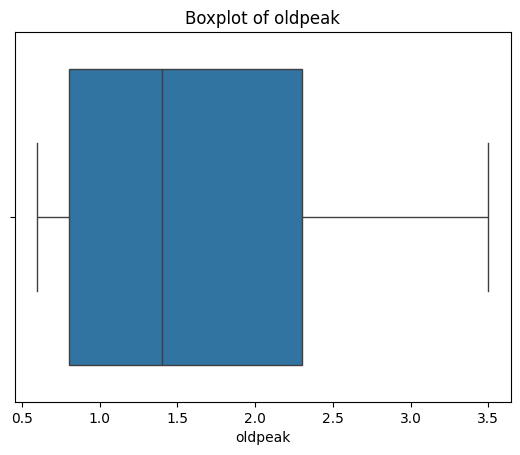

In [ ]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


In [ ]:

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) |
          (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df.dtypes

df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')


In [ ]:
df_encoded = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)


In [ ]:
df_encoded

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_2,cp_3,thal_2,slope_2
0,1.001380,1,1.297771,-0.899843,1,0,-1.375219,0,0.090536,0,1,False,True,False,False
1,-1.365519,1,-0.162221,1.394756,0,1,0.973232,0,1.176965,0,1,True,False,True,False
3,0.364138,1,-1.135550,-0.494913,0,1,0.401987,0,-1.267500,0,1,False,False,True,True


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_encoded[scaled_features] = scaler.fit_transform(df_encoded[scaled_features])


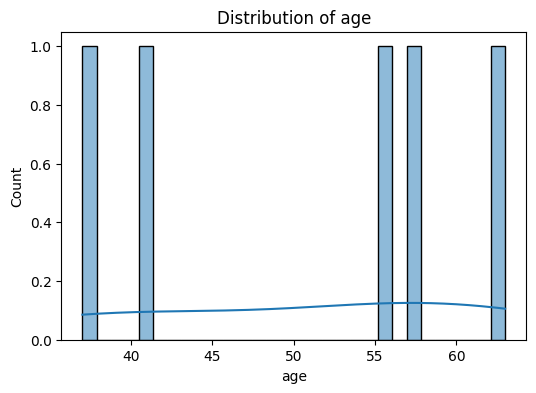

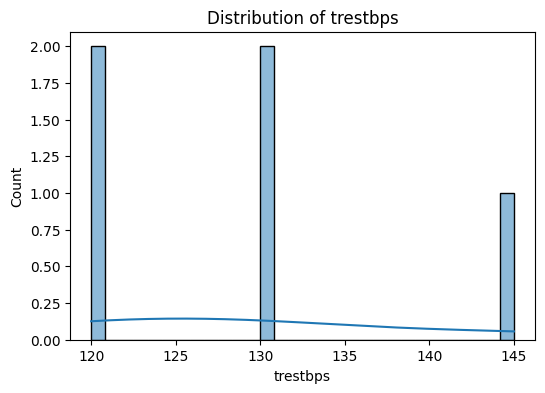

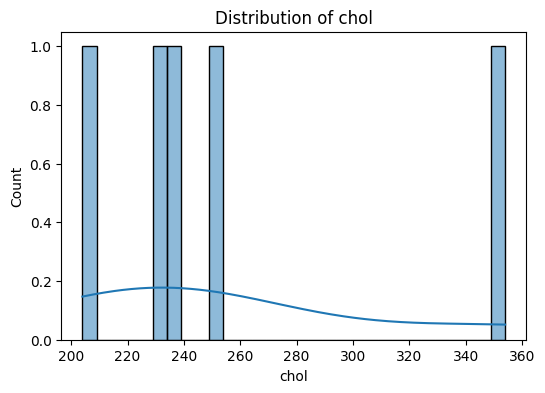

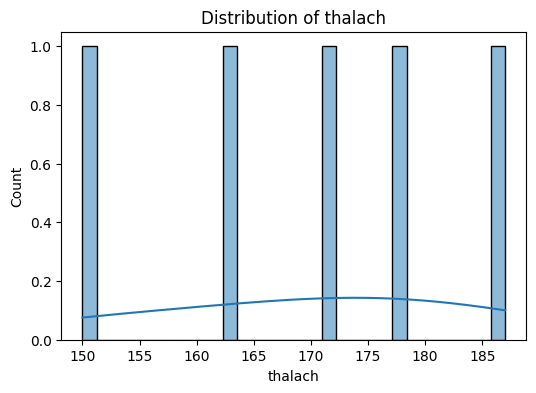

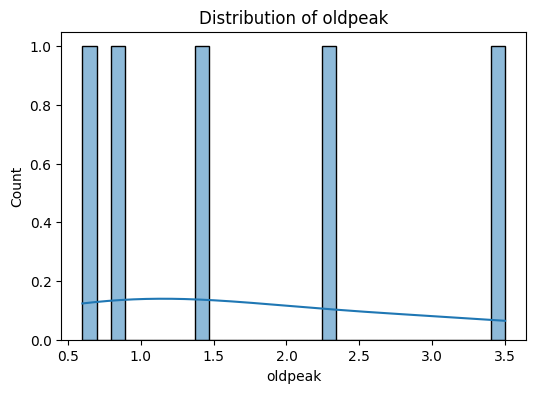

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


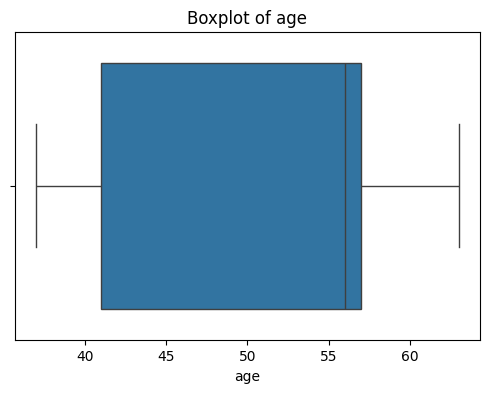

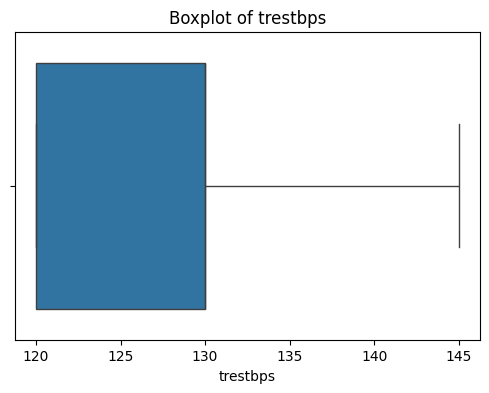

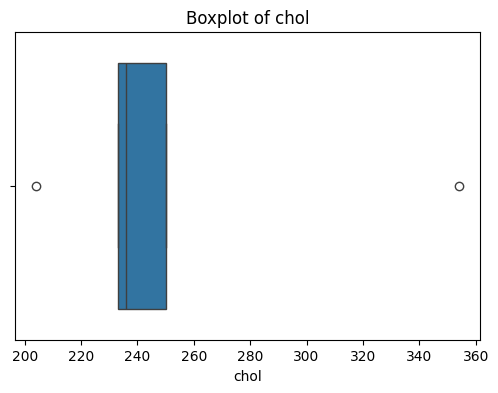

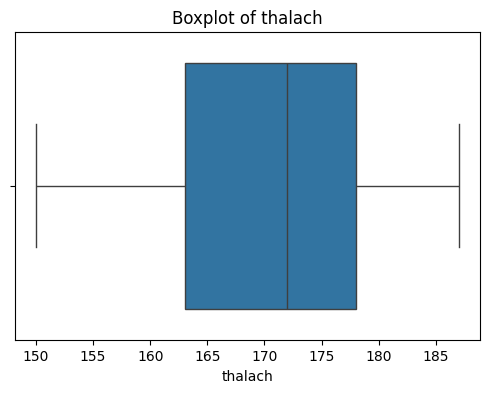

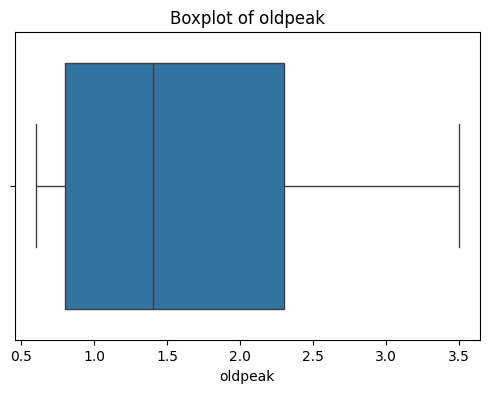

In [ ]:
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


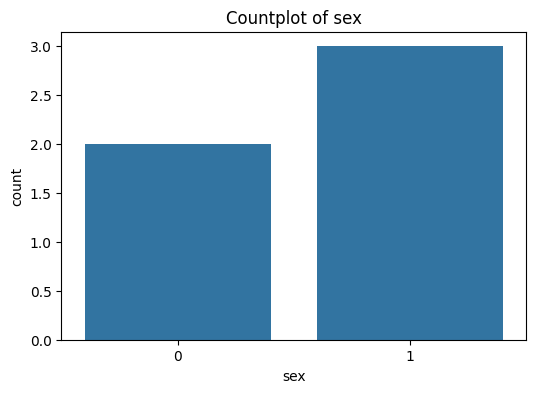

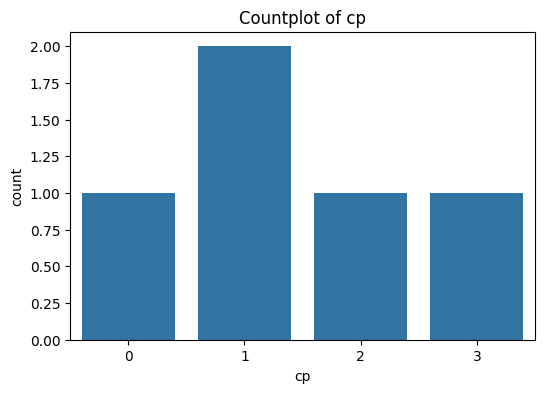

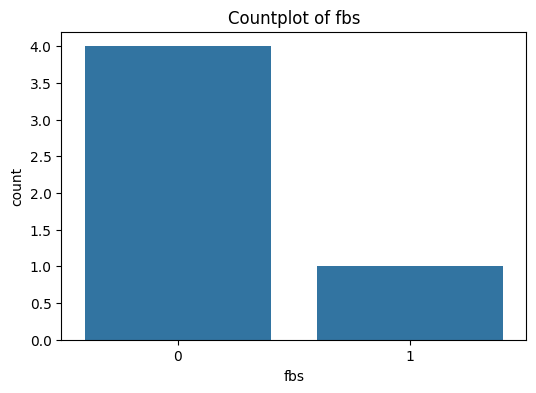

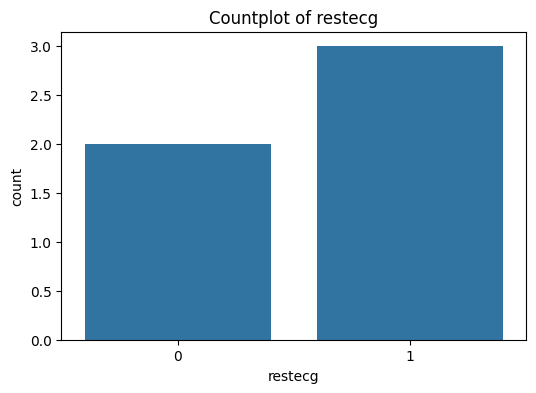

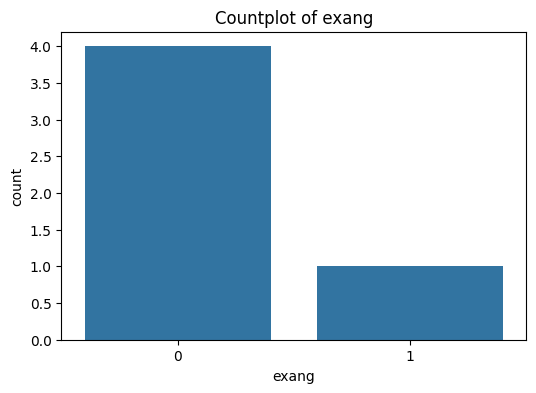

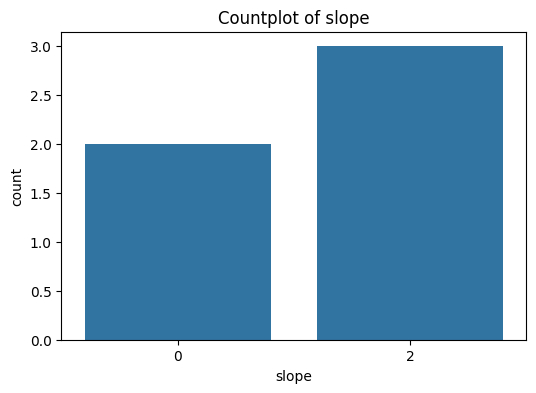

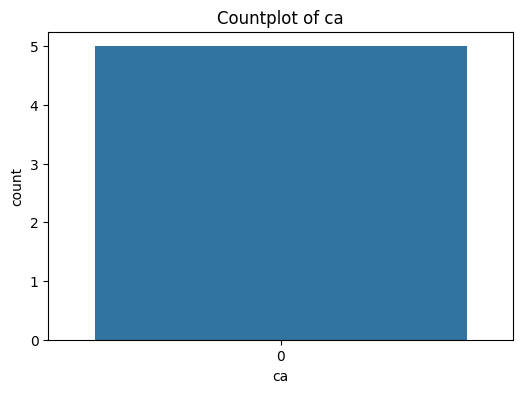

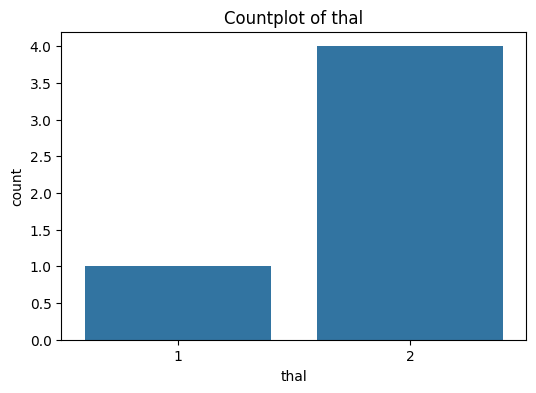

In [ ]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.show()


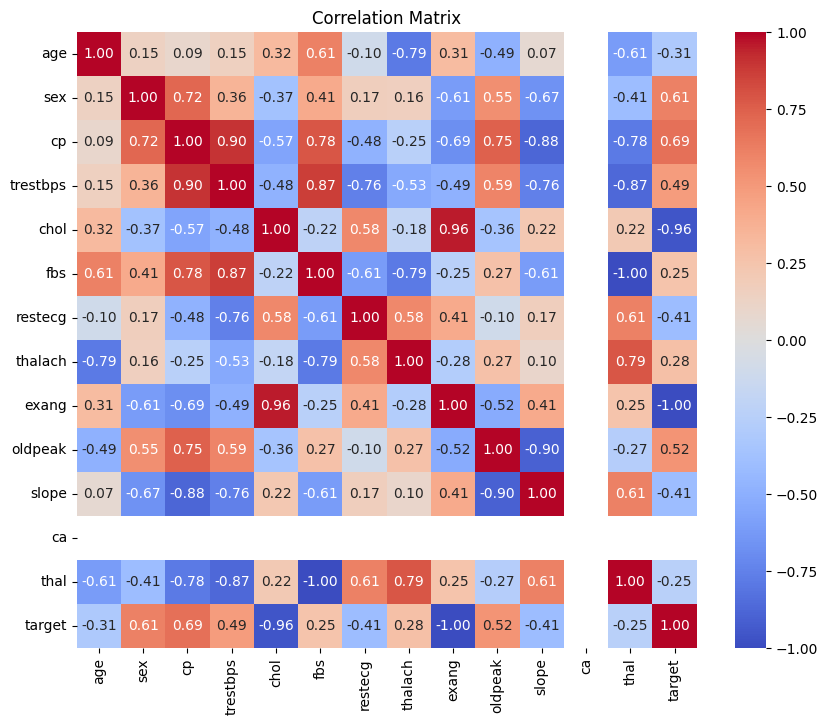

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Make sure pandas is imported

# Assuming 'data' is your original data dictionary
data = {
    'age': [63, 37, 41, 56, 57],
    'sex': [1, 1, 0, 1, 0],
    'cp': [3, 2, 1, 1, 0],
    'trestbps': [145, 130, 130, 120, 120],
    'chol': [233, 250, 204, 236, 354],
    'fbs': [1, 0, 0, 0, 0],
    'restecg': [0, 1, 0, 1, 1],
    'thalach': [150, 187, 172, 178, 163],
    'exang': [0, 0, 0, 0, 1],
    'oldpeak': [2.3, 3.5, 1.4, 0.8, 0.6],
    'slope': [0, 0, 2, 2, 2],
    'ca': [0, 0, 0, 0, 0],
    'thal': [1, 2, 2, 2, 2],
    'target': [1, 1, 1, 1, 0]
}

# Recreate the DataFrame 'df'
df = pd.DataFrame(data)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

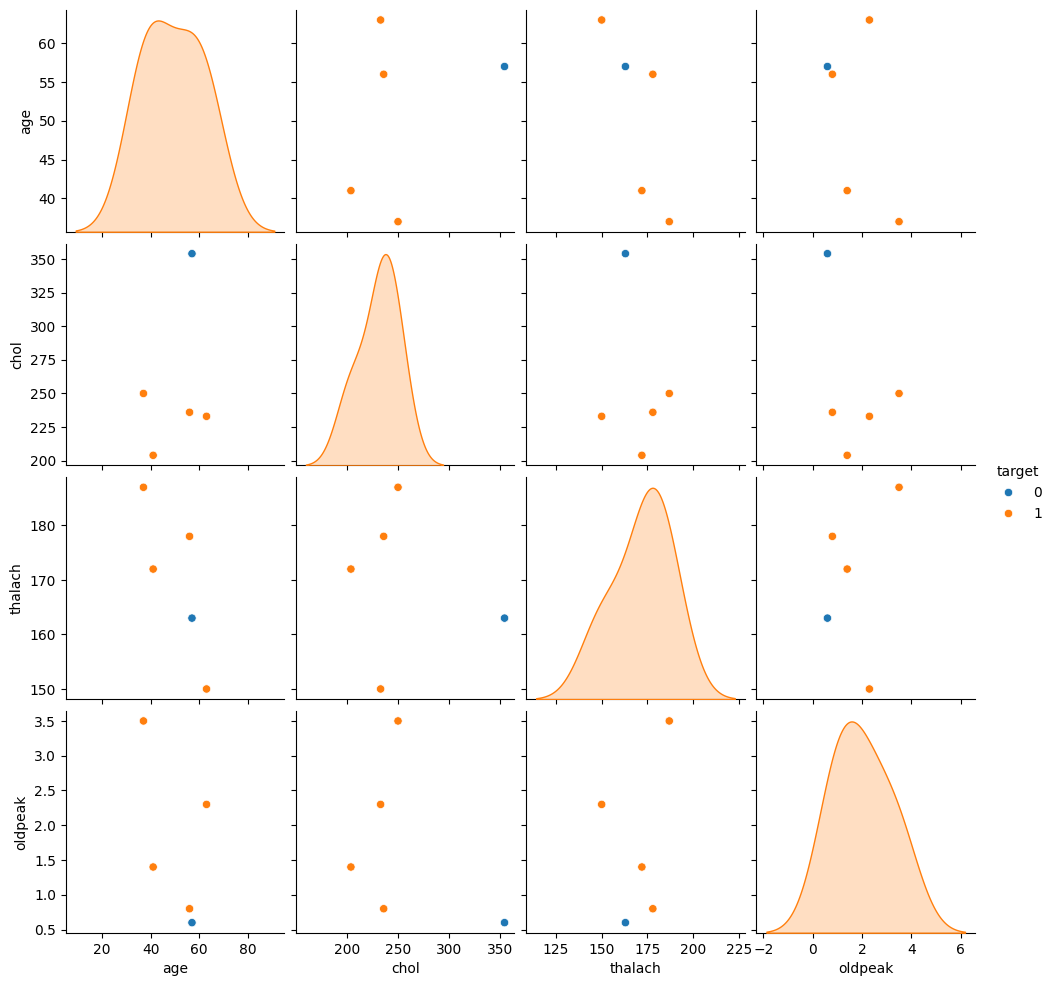

In [11]:
sns.pairplot(df, vars=['age', 'chol', 'thalach', 'oldpeak'], hue='target')
plt.show()


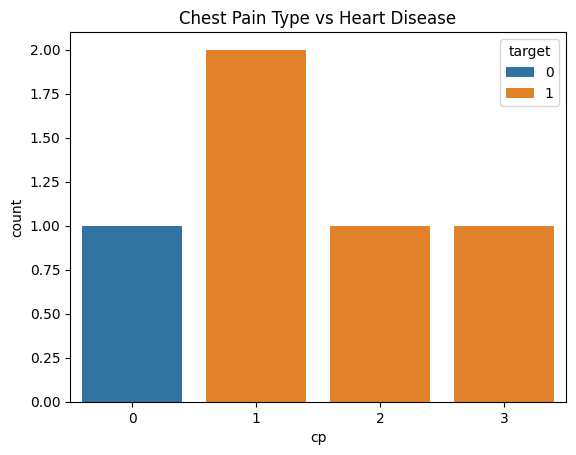

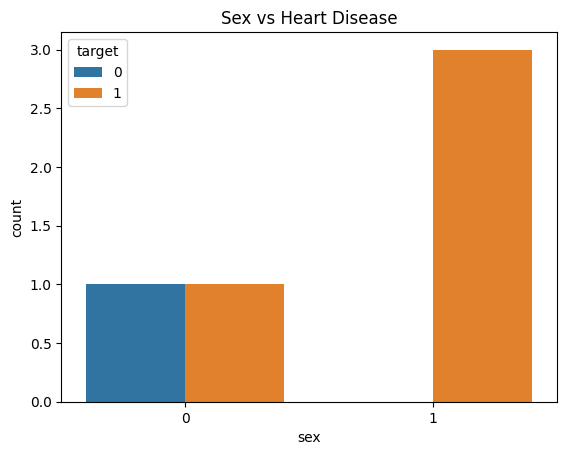

In [12]:
# Example: Chest Pain vs Target
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

# Example: Sex vs Target
sns.countplot(x='sex', hue='target', data=df)
plt.title('Sex vs Heart Disease')
plt.show()


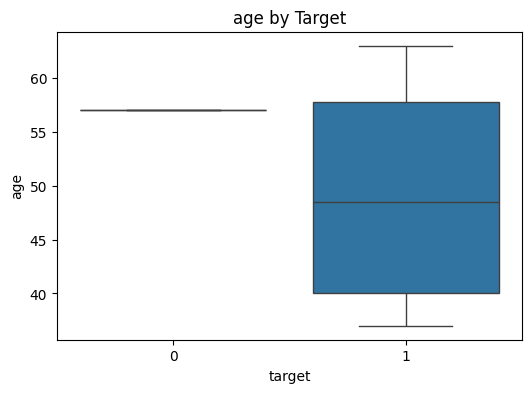

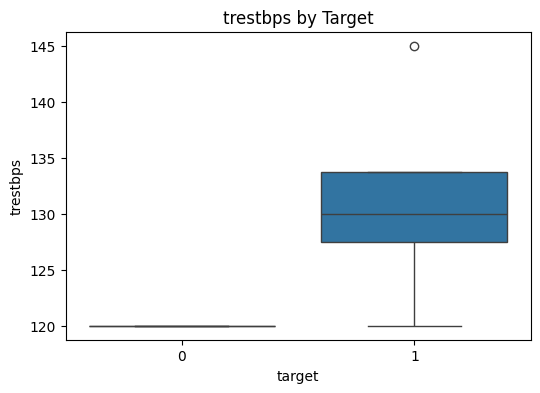

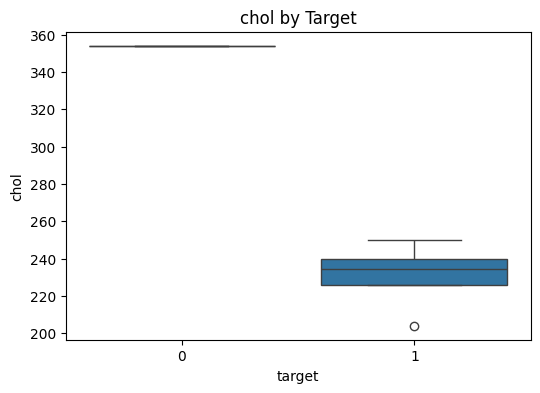

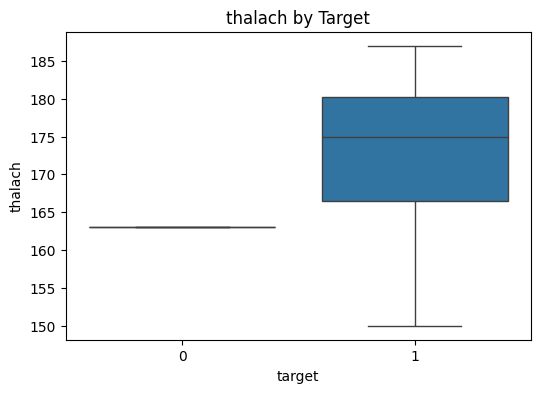

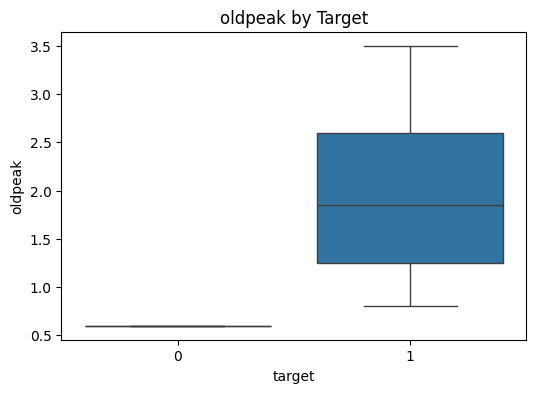

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Make sure pandas is imported

# Assuming 'data' is your original data dictionary
data = {
    'age': [63, 37, 41, 56, 57],
    'sex': [1, 1, 0, 1, 0],
    'cp': [3, 2, 1, 1, 0],
    'trestbps': [145, 130, 130, 120, 120],
    'chol': [233, 250, 204, 236, 354],
    'fbs': [1, 0, 0, 0, 0],
    'restecg': [0, 1, 0, 1, 1],
    'thalach': [150, 187, 172, 178, 163],
    'exang': [0, 0, 0, 0, 1],
    'oldpeak': [2.3, 3.5, 1.4, 0.8, 0.6],
    'slope': [0, 0, 2, 2, 2],
    'ca': [0, 0, 0, 0, 0],
    'thal': [1, 2, 2, 2, 2],
    'target': [1, 1, 1, 1, 0]
}

# Recreate the DataFrame 'df'
df = pd.DataFrame(data)

# Define numerical_features here
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} by Target')
    plt.show()

In [15]:
bins = [29, 40, 50, 60, 77]
labels = ['30-40', '41-50', '51-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


In [16]:
df['chol_bin'] = pd.cut(df['chol'], bins=[0, 200, 240, 600], labels=['Normal', 'Borderline High', 'High'])


In [17]:
df['age_oldpeak_interaction'] = df['age'] * df['oldpeak']
df['thalach_per_age'] = df['thalach'] / df['age']


In [18]:
# Already one-hot encoded, but you could group if needed (based on performance test)
df['cp_simplified'] = df['cp'].replace({0: 'low_risk', 1: 'moderate', 2: 'moderate', 3: 'high_risk'})


In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['age', 'oldpeak']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['age', 'oldpeak']))
df = pd.concat([df, poly_df], axis=1)


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

features = df.select_dtypes(include=[np.number]).drop(columns='target')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=5)
pca_features = pca.fit_transform(scaled_features)

# Add back PCA features to df
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i}' for i in range(1, 6)])
df_pca = pd.concat([df.reset_index(drop=True), pca_df], axis=1)


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd




categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with LogisticRegression
encoded_data = encoder.fit_transform(X[categorical_features])


encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'X' and 'y' are defined before this cell

# Split data into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, perform feature engineering and encoding on X_train and X_test separately

# --- Feature Engineering ---
# (Apply any feature engineering steps to X_train and X_test)

# --- One-Hot Encoding ---

# Fit OneHotEncoder on training data only
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train[categorical_features]) # Fit only on X_train

# Transform both train and test sets
X_train_encoded = encoder.transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Create DataFrames from encoded data
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

# Concatenate encoded features with original features
X_train = pd.concat([X_train.drop(columns=categorical_features), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_features), X_test_encoded_df], axis=1)

# ... Continue with model training and evaluation ...

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Assuming X_train, X_test, y_train, y_test are defined

# Initialize and fit the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # Or your preferred parameters
lr_model.fit(X_train, y_train)  # Fit the model before prediction

# Probabilities
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# ... (Rest of your code for ROC curve plotting)

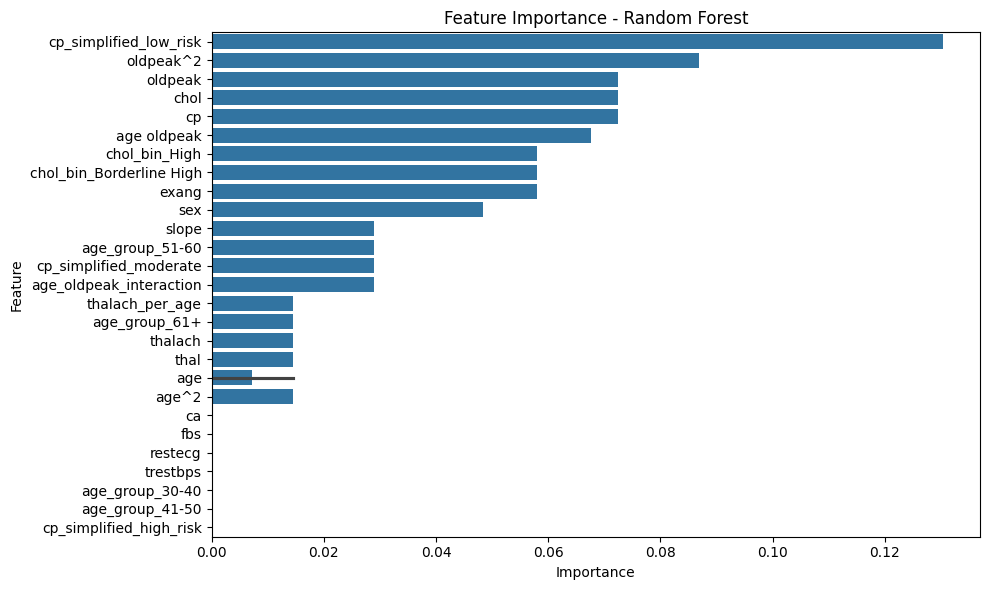

In [34]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()
